In [1]:
# Import libraries we need
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats


In [2]:
# Import data from csv
df=pd.read_csv('Documents/Project Two/Data/kc_house_data.csv')

In [3]:
# Check the data we have in our dataframe
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/09/2014,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/09/2014,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# lets drop the columns we dont need for our business problem
df.drop(['view', 'condition', 'date', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'id', 'zipcode'], axis=1, inplace=True)

In [5]:
# Check the data we have in our new dataframe
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
0,221900,3,1.00,1180,5650,1.0,NaN,7
1,538000,3,2.25,2570,7242,2.0,0.0,7
2,180000,2,1.00,770,10000,1.0,0.0,6
3,604000,4,3.00,1960,5000,1.0,0.0,7
4,510000,3,2.00,1680,8080,1.0,0.0,8


In [6]:
# Below we will check the information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  int64  
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   grade        21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [7]:
# Covert floor and bathroom to integer
df['floors'] = df['floors'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)

In [8]:
# Let's check if our data are converted to integer
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  int64  
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  int32  
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  int32  
 6   waterfront   19221 non-null  float64
 7   grade        21597 non-null  int64  
dtypes: float64(1), int32(2), int64(5)
memory usage: 1.2 MB


In [9]:
# Now we can have a look at our data statistics
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000
mean,5.402966e+05,3.373200,1.750660,2080.321850,1.509941e+04,1.445988,0.007596,7.657915
std,3.673681e+05,0.926299,0.734042,918.106125,4.141264e+04,0.551658,0.086825,1.173200
min,7.800000e+04,1.000000,0.000000,370.000000,5.200000e+02,1.000000,0.000000,3.000000
25%,3.220000e+05,3.000000,1.000000,1430.000000,5.040000e+03,1.000000,0.000000,7.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,7.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068500e+04,2.000000,0.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,13.000000


In [10]:
# Next step we check if we have null data
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
grade             0
dtype: int64

In [11]:
# As we saw above the column waterfront miss some values. l will fill these values with zero so we dont have problems when we create dummy variables
df['waterfront'].fillna(0, inplace=True)

In [12]:
# Lets check now if we have other missing data
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
grade          0
dtype: int64

In [13]:
# Check the number of bedrooms in our database
frequency_counts = df['bedrooms'].value_counts()
frequency_counts

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [14]:
# Lets clean the data for houses with more than 5 bedrooms, as in our analyses we need residence with 5 bedrooms max
df = df[df['bedrooms'] < 6]
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
0,221900,3,1,1180,5650,1,0.0,7
1,538000,3,2,2570,7242,2,0.0,7
2,180000,2,1,770,10000,1,0.0,6
3,604000,4,3,1960,5000,1,0.0,7
4,510000,3,2,1680,8080,1,0.0,8


In [15]:
# Check if our data now are up to 5 bedrooms
frequency_counts = df['bedrooms'].value_counts()
frequency_counts

bedrooms
3    9824
4    6882
2    2760
5    1601
1     196
Name: count, dtype: int64

In [16]:
# Below l will check the number of bathrooms for each apartment
frequency_counts = df['bathrooms'].value_counts()
frequency_counts

bathrooms
2    10427
1     8321
3     2121
4      276
0       75
5       35
6        8
Name: count, dtype: int64

In [17]:
# Substitute the apartment with zero bathroom with one bathroom
df['bathrooms'] = df['bathrooms'].replace(0, 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
0,221900,3,1,1180,5650,1,0.0,7
1,538000,3,2,2570,7242,2,0.0,7
2,180000,2,1,770,10000,1,0.0,6
3,604000,4,3,1960,5000,1,0.0,7
4,510000,3,2,1680,8080,1,0.0,8


In [18]:
# Lets check if the changes are made
frequency_counts = df['bathrooms'].value_counts()
frequency_counts

bathrooms
2    10427
1     8396
3     2121
4      276
5       35
6        8
Name: count, dtype: int64

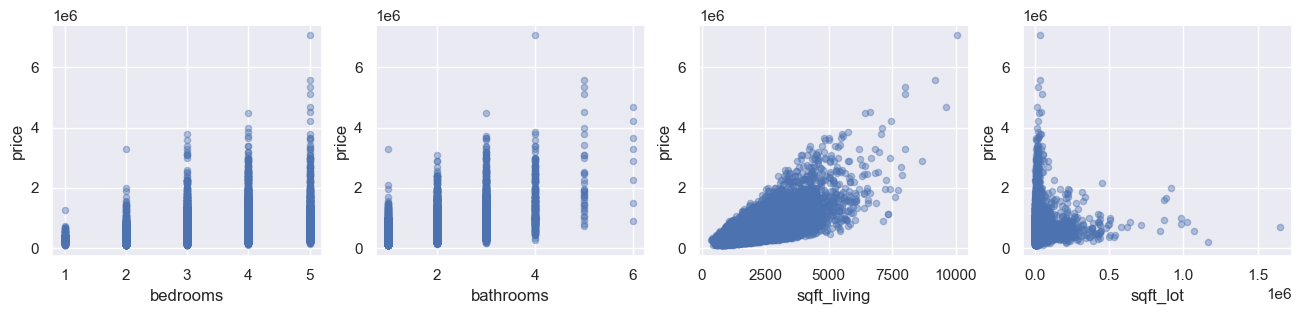

In [22]:
# Below we will visualize the Linearity between dependent and independent variables
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

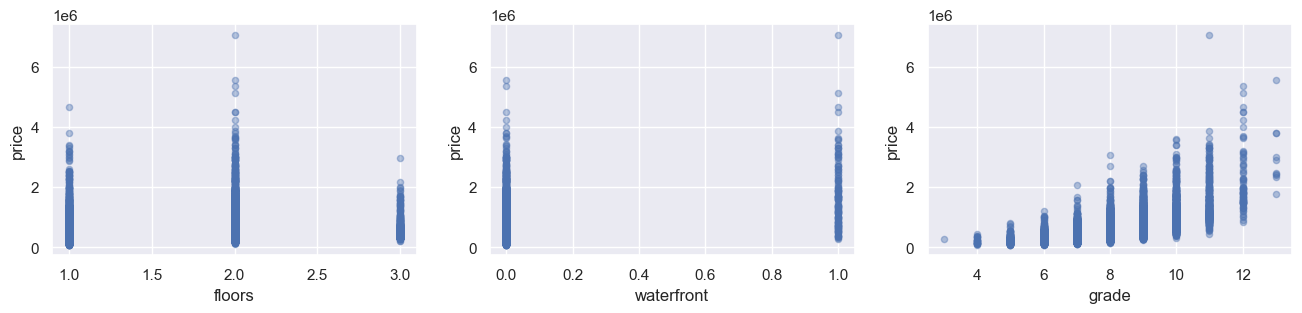

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

C:\Users\jona_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


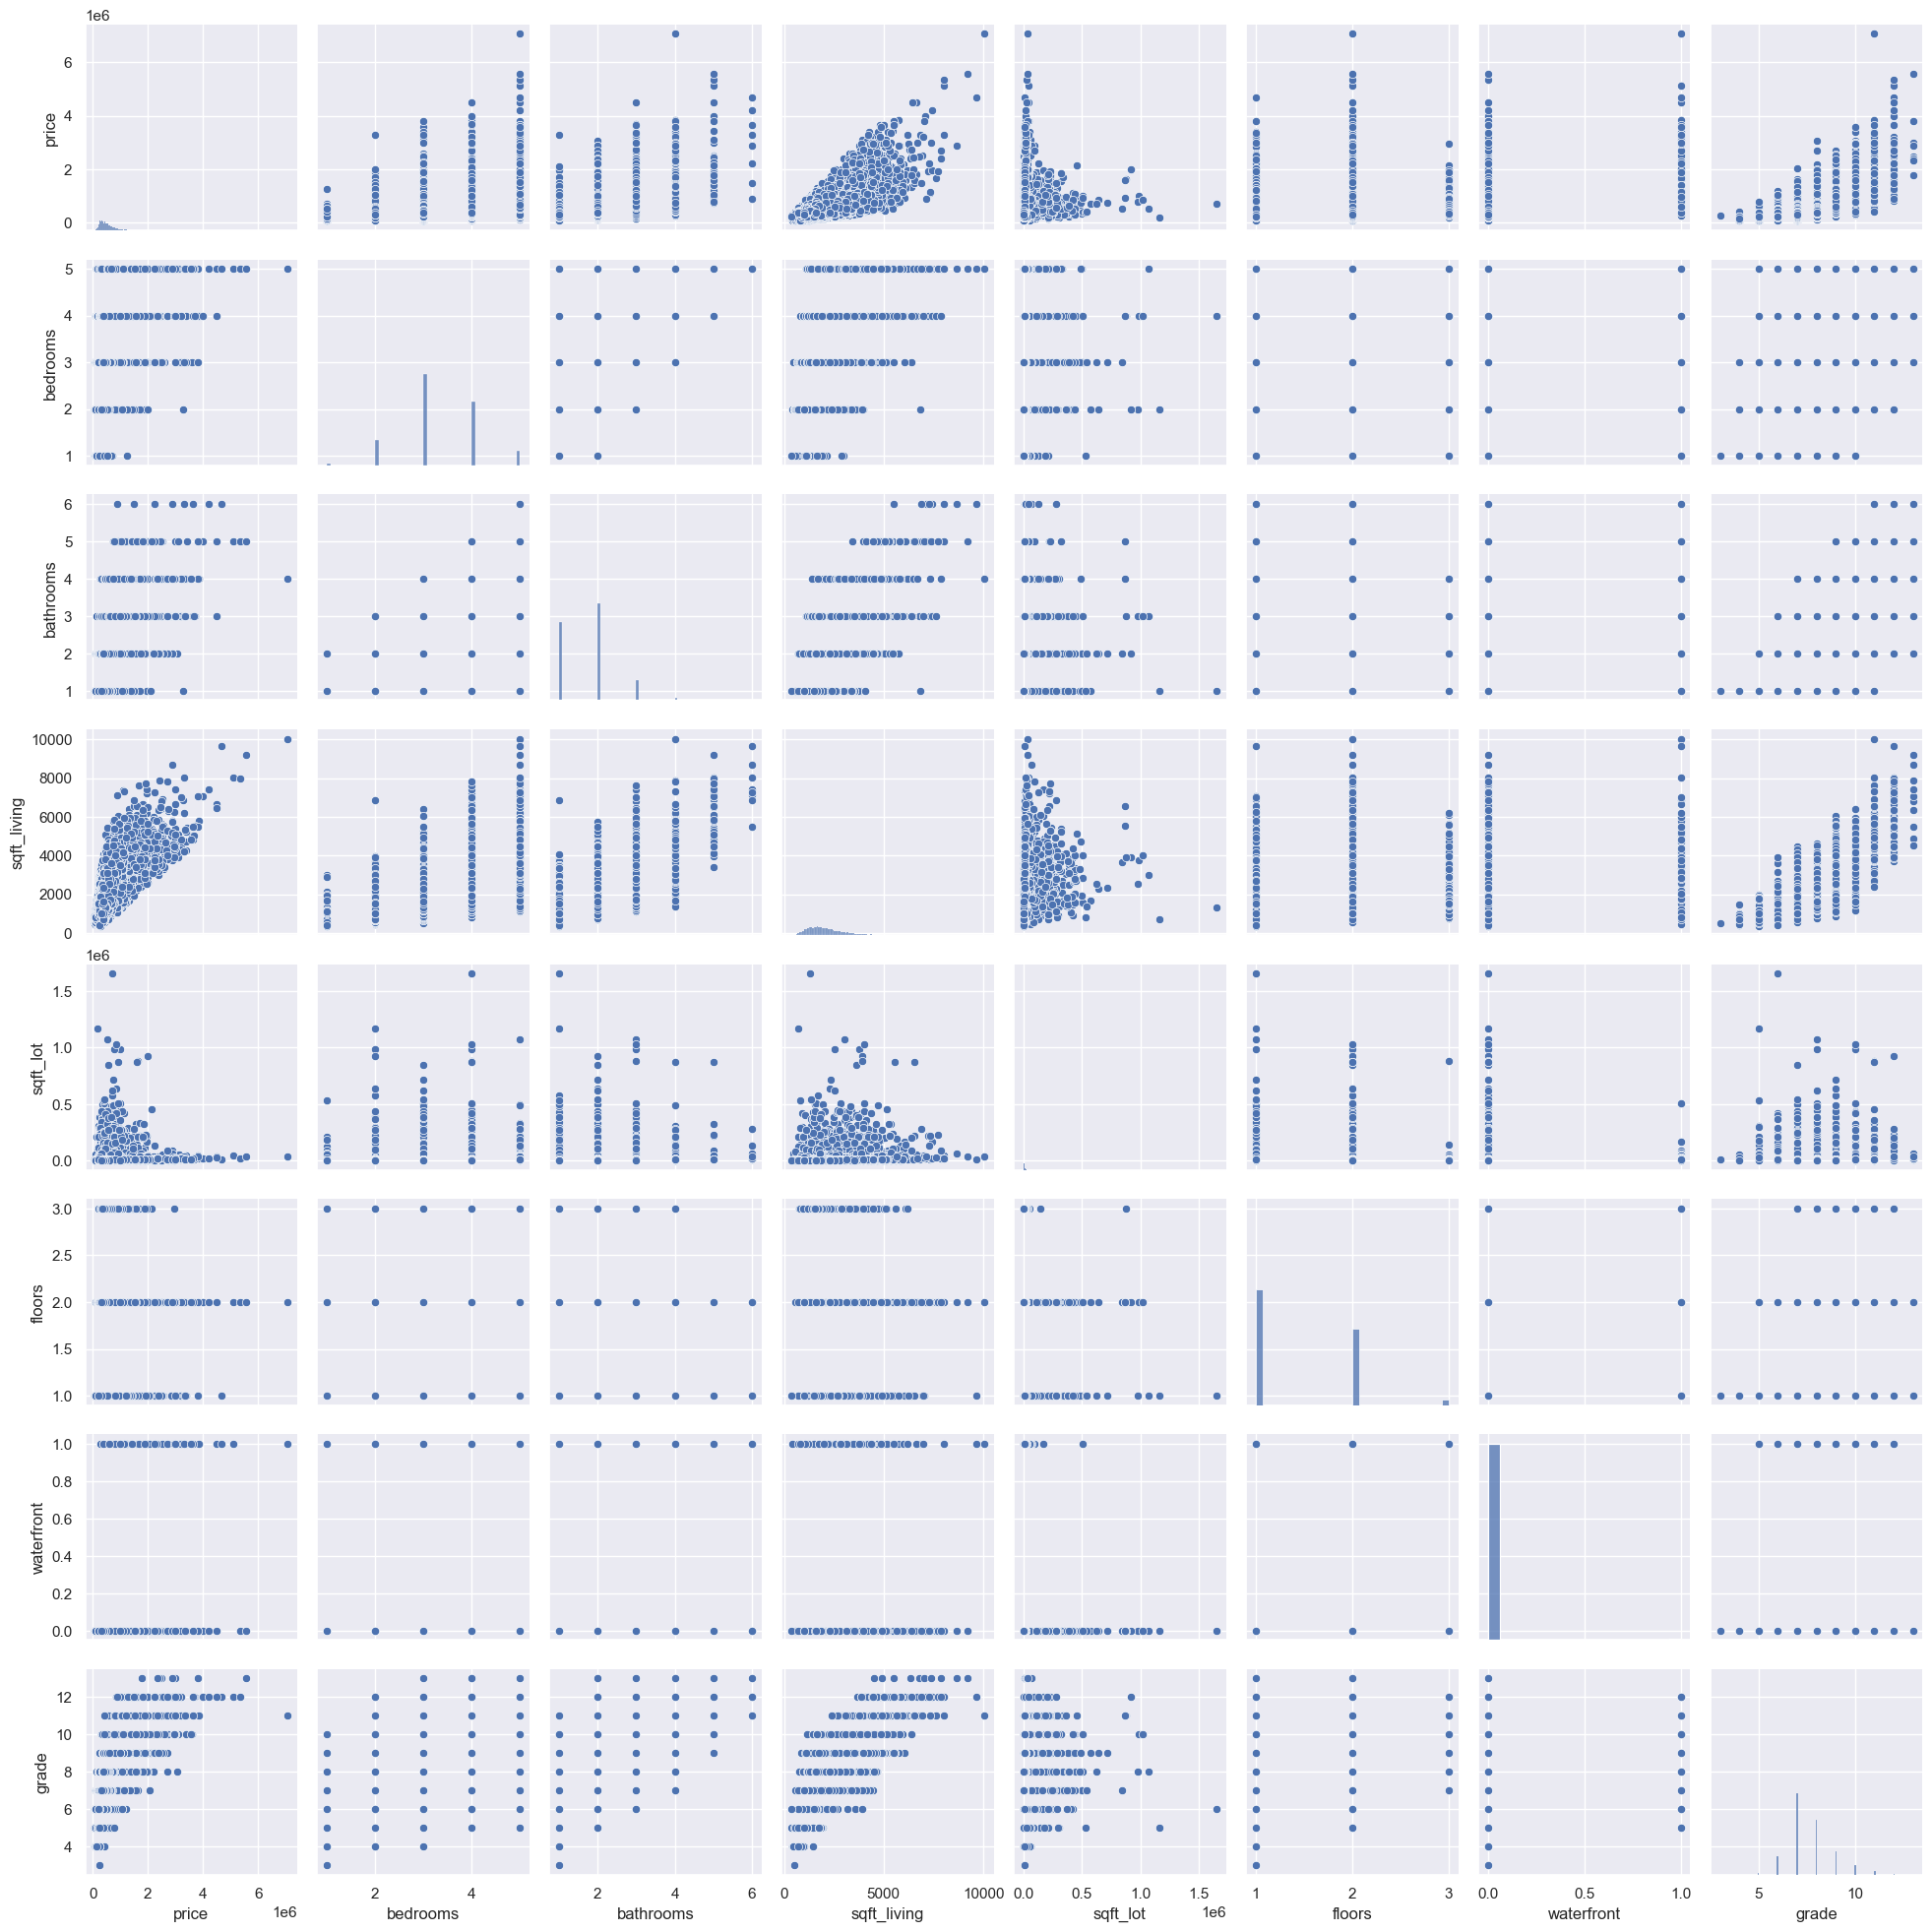

In [24]:
sns.pairplot(df)

C:\Users\jona_\AppData\Local\Temp\ipykernel_4668\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

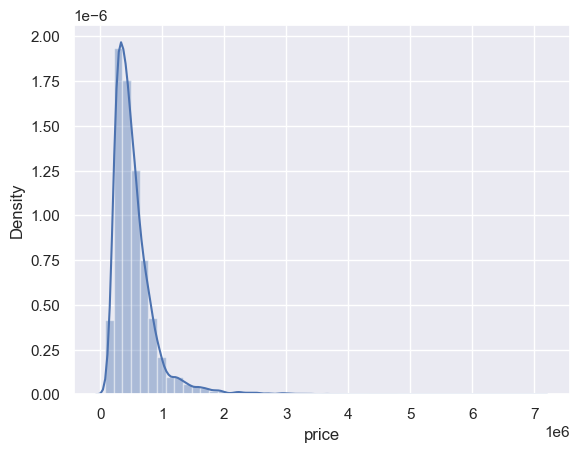

In [25]:
sns.distplot(df['price'])

In [27]:
# We can see from above visualizations that we have many categorical variables like bedrooms, bathrooms, floor, waterfont and grade.
# Square feet living seems like it has a kind of linear relation with price and square feet of lot has not exactly a linear fit.
#From the graph of price dencity we can see that the data are normally distributed but a little left skewed.

In [26]:
# Now create our model
formula = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+grade'
model1 = ols(formula=formula, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     4280.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:04:33   Log-Likelihood:            -2.9255e+05
No. Observations:               21263   AIC:                         5.851e+05
Df Residuals:                   21255   BIC:                         5.852e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.587e+05   1.41e+04    -32.461      0.000   -4.86e+05   -4.31e+05
bedrooms    -4.883e+04   2401.645    -20.332      0.000   -5.35e+04   -4.41e+04
bathrooms    2.895e+04   3322.227      8.715      0.000    2.24e+04    3.55e+04
sqft_living   192.0830      3.448     55.709      0.000     185.325     198.841
sqft_lot       -0.3252      0.039     -8.413      0.000      -0.401      -0.249
floors      -7.357e+04   3434.195    -21.422      0.000   -8.03e+04   -6.68e+04
waterfront   8.019e+05   1.94e+04     41.272      0.000    7.64e+05     8.4e+05
grade        1.067e+05   2247.426     47.480      0.000    1.02e+05    1.11e+05
==============================================================================
Omnibus:                    12360.985   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           311368.312
Skew:                           2.322   Prob(JB):                         0.00
Kurtosis:                      21.163   Cond. No.                     5.47e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

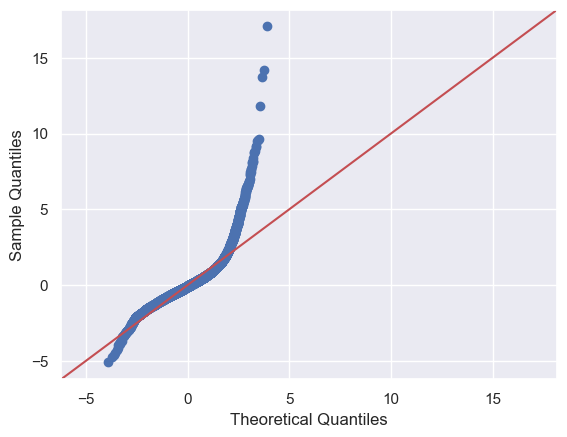

In [28]:
# Now we will check three assumption of linear regression. We will visualize the normality of residuals in our model
import scipy.stats as stats
residuals = model1.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [30]:
# To check homoscedasticity we will show in a graph the residuals and y predicted values
df1=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront','grade' ]].copy()
x=df1
y_pred = model1.predict(x)

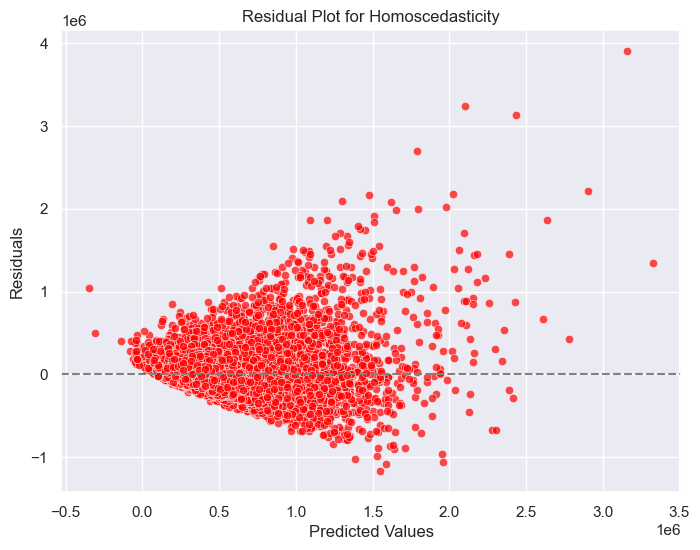

In [33]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=model1.resid, data=df, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [37]:
# Conclusions Model 2
#Following are the conclusions based on the first model we built.

#1) R-sqaured and Adjusted R-squared (extent of fit) are the same 0.585, which indicates that 58.5% of the variance in the house price can be explained by our predictors..
#2) Prob(F-stats) (overall model fit) is  0.00 - Model fit is  statistically significant.
#3) p-values - p-values for all the coefficients (all are 0.000) seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.

# We can see that the equation of our best fitted line is:
# price=
# -454700-48830*bedrooms+28950*bathrooms+192.083*sqft_living-0.3252*sqft_lot-73570*floors+801900*waterfront+106700*grade
# As we can see from our model the most important variable of our model is waterfront.

#From our visualization for normality and variance of our residuals, we can say that our residuals are not totally normal distributed and ther is an evident heteroscedasticity in our data.


In [36]:
# Now we will create our model 2. 

In [86]:
# We will check for Multicollinearity
#Lets create a data frame with only our predictors
df_predictors=df1

In [87]:
df_predictors.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
0,3,1,1180,5650,1,0.0,7
1,3,2,2570,7242,2,0.0,7
2,2,1,770,10000,1,0.0,6
3,4,3,1960,5000,1,0.0,7
4,3,2,1680,8080,1,0.0,8


C:\Users\jona_\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


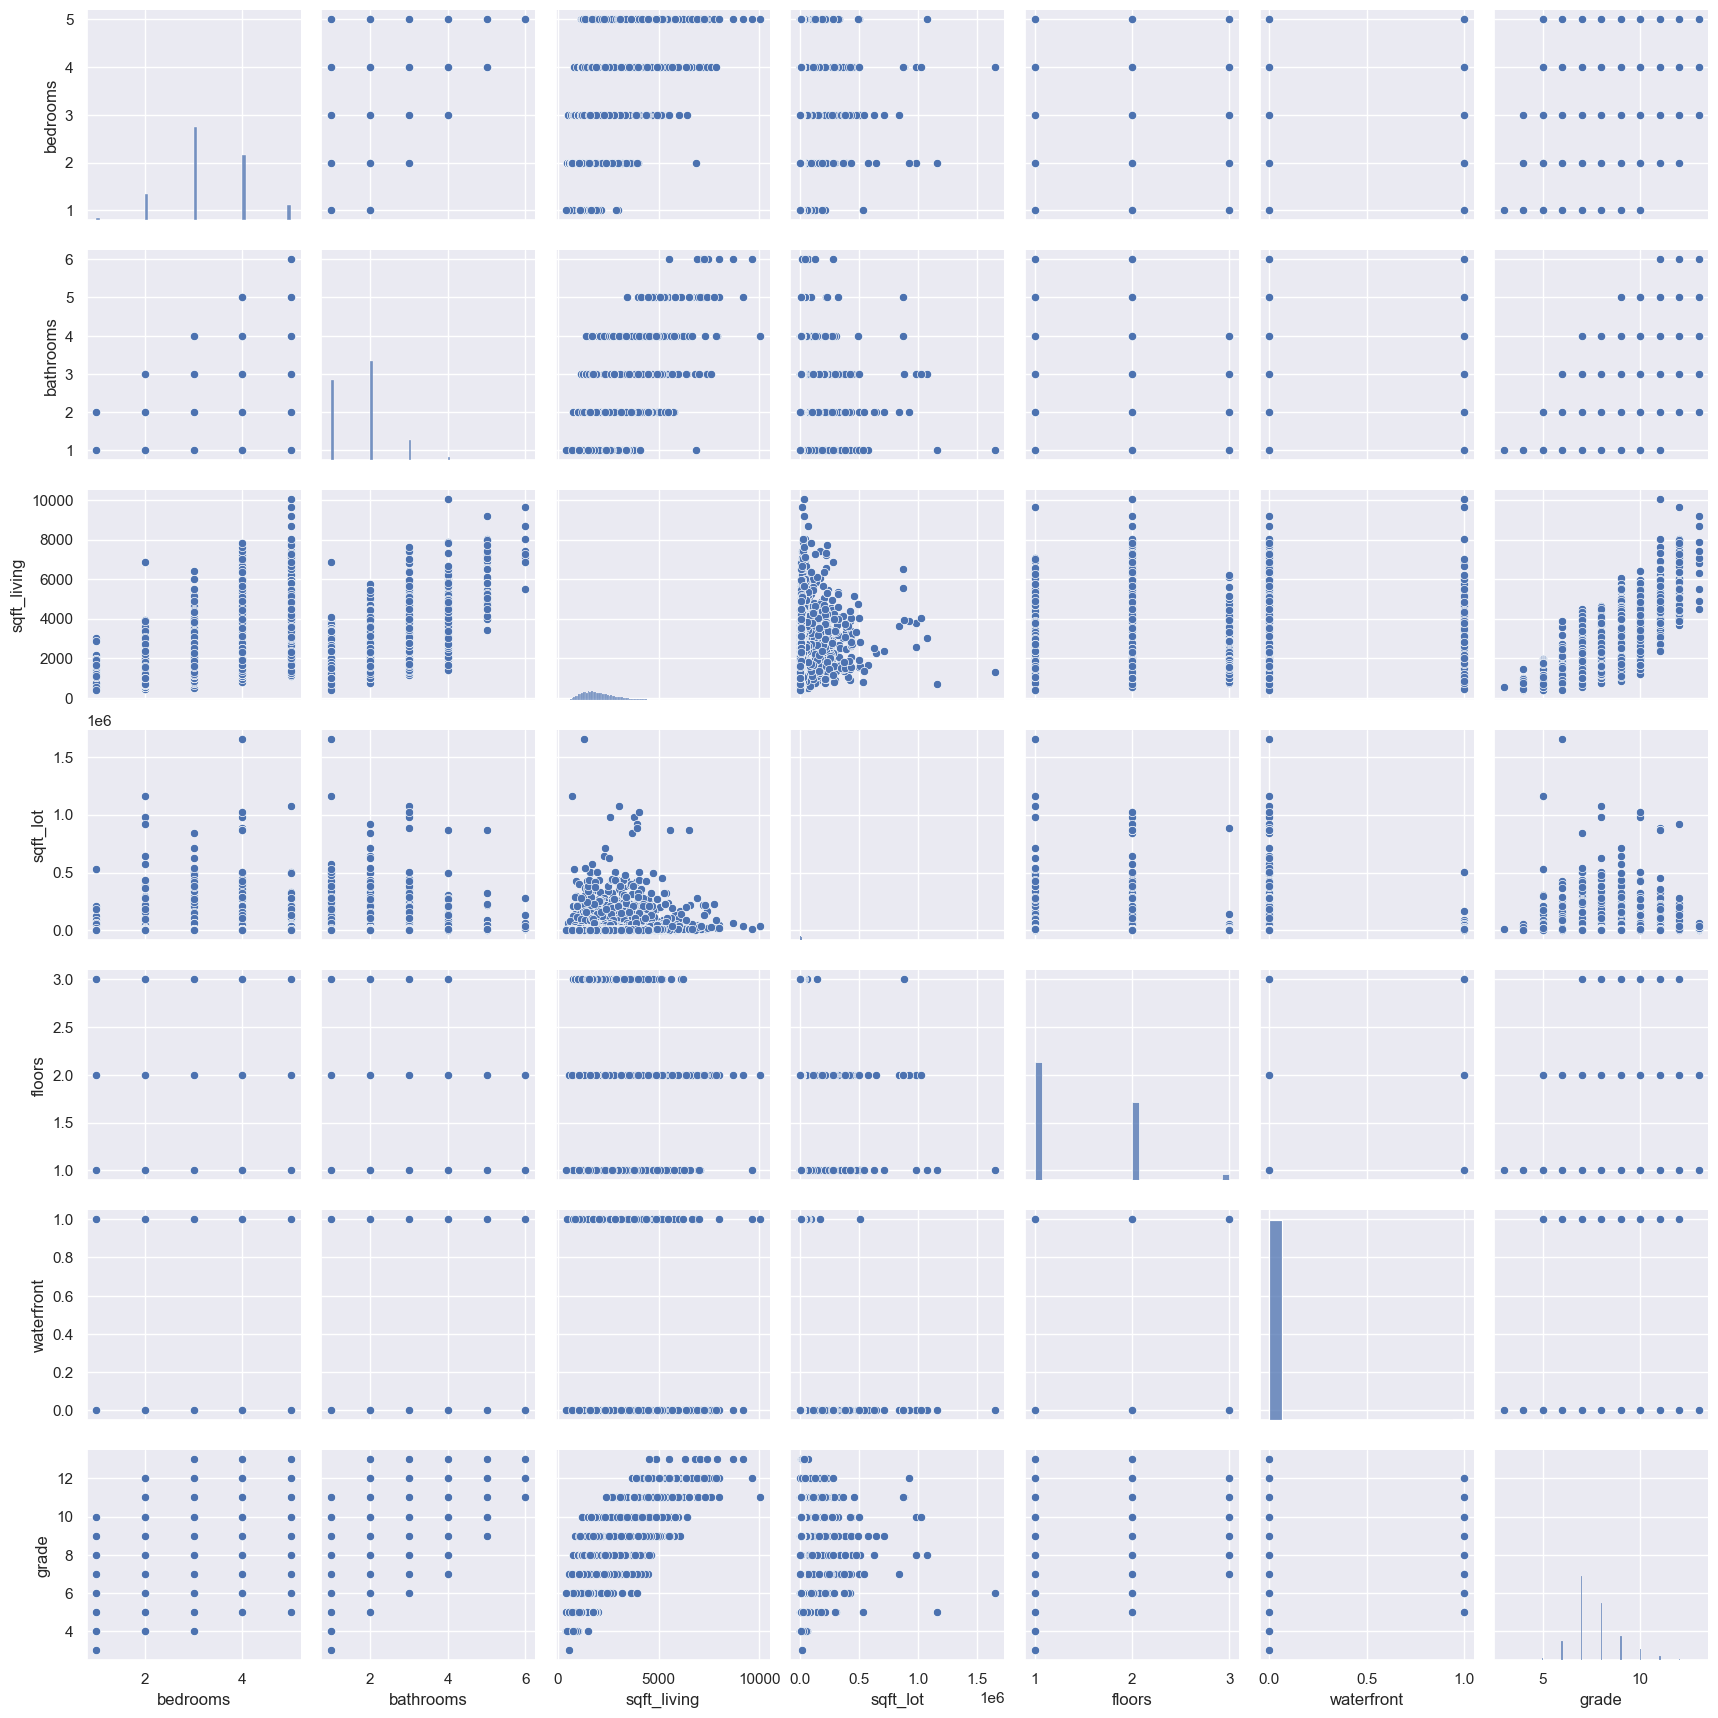

In [104]:
# We will create some plots to check the linearity between predictors
sns.pairplot(df_predictors)

In [88]:
# Now calculate the correlation coefficients between predictors
df_predictors.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
bedrooms,1.000000,0.453272,0.590997,0.033895,0.168836,-0.005088,0.386365
bathrooms,0.453272,1.000000,0.688937,0.084641,0.493078,0.061596,0.611115
sqft_living,0.590997,0.688937,1.000000,0.171037,0.354223,0.105272,0.767759
sqft_lot,0.033895,0.084641,0.171037,1.000000,-0.010556,0.021281,0.113313
floors,0.168836,0.493078,0.354223,-0.010556,1.000000,0.017685,0.474019
waterfront,-0.005088,0.061596,0.105272,0.021281,0.017685,1.000000,0.081855
grade,0.386365,0.611115,0.767759,0.113313,0.474019,0.081855,1.000000


In [89]:
abs(df_predictors.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade
bedrooms,True,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False
sqft_living,False,False,True,False,False,False,True
sqft_lot,False,False,False,True,False,False,False
floors,False,False,False,False,True,False,False
waterfront,False,False,False,False,False,True,False
grade,False,False,True,False,False,False,True


In [90]:
# Based on table above seems like sqft_living and grade have a correlation. The correlation coeficient is 0.767759.
# Now that we identified the variables that are correlated to each other we will drop the grade column
df.drop(columns=['grade'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900,3,1,1180,5650,1,0.0
1,538000,3,2,2570,7242,2,0.0
2,180000,2,1,770,10000,1,0.0
3,604000,4,3,1960,5000,1,0.0
4,510000,3,2,1680,8080,1,0.0


In [93]:
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront']

In [123]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
count,2.126300e+04,21263.000000,21263.000000,21263.000000,2.126300e+04,21263.000000,21263.000000
mean,5.354206e+05,3.326012,1.737290,2059.754503,1.505278e+04,1.444387,0.006678
std,3.547799e+05,0.827807,0.705959,893.214278,4.146123e+04,0.551718,0.081449
min,7.800000e+04,1.000000,1.000000,370.000000,5.200000e+02,1.000000,0.000000
25%,3.200000e+05,3.000000,1.000000,1420.000000,5.040000e+03,1.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1900.000000,7.600000e+03,1.000000,0.000000
75%,6.399665e+05,4.000000,2.000000,2520.000000,1.062300e+04,2.000000,0.000000
max,7.060000e+06,5.000000,6.000000,10040.000000,1.651359e+06,3.000000,1.000000


In [120]:
df['waterfront'] = df['waterfront'].astype(int)

In [128]:
# Create dummy variables
dummies = pd.get_dummies(data=df, columns=['bedrooms', 'bathrooms', 'floors', 'waterfront'], drop_first=True )

df_preprocessed = df.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

,price,sqft_living,sqft_lot,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,floors_2,floors_3,waterfront_1
0,221900,1180,5650,221900,1180,5650,False,True,False,False,False,False,False,False,False,False,False,False
1,538000,2570,7242,538000,2570,7242,False,True,False,False,True,False,False,False,False,True,False,False
2,180000,770,10000,180000,770,10000,True,False,False,False,False,False,False,False,False,False,False,False
3,604000,1960,5000,604000,1960,5000,False,False,True,False,False,True,False,False,False,False,False,False
4,510000,1680,8080,510000,1680,8080,False,True,False,False,True,False,False,False,False,False,False,False


In [129]:
# Let's remove the duplicated columns
df_preprocessed=df_preprocessed.T.drop_duplicates().T

In [130]:
df_preprocessed.head()

,price,sqft_living,sqft_lot,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,floors_2,floors_3,waterfront_1
0,221900,1180,5650,False,True,False,False,False,False,False,False,False,False,False,False
1,538000,2570,7242,False,True,False,False,True,False,False,False,False,True,False,False
2,180000,770,10000,True,False,False,False,False,False,False,False,False,False,False,False
3,604000,1960,5000,False,False,True,False,False,True,False,False,False,False,False,False
4,510000,1680,8080,False,True,False,False,True,False,False,False,False,False,False,False


In [97]:
# Now create our model number 2
X = df_preprocessed.drop('price', axis=1)
y = df_preprocessed['price']

In [103]:
X_int = sm.add_constant(X)
model2 = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     1979.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:02:16   Log-Likelihood:            -2.9302e+05
No. Observations:               21263   AIC:                         5.861e+05
Df Residuals:                   21248   BIC:                         5.862e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.966e+04   1.69e+04      3.534      0.000    2.66e+04    9.27e+04
sqft_living      282.8624      2.918     96.925      0.000     277.142     288.583
sqft_lot          -0.3655      0.040     -9.242      0.000      -0.443      -0.288
bedrooms_2     -5579.7056   1.73e+04     -0.322      0.747   -3.95e+04    2.84e+04
bedrooms_3     -8.797e+04   1.71e+04     -5.156      0.000   -1.21e+05   -5.45e+04
bedrooms_4     -1.304e+05   1.75e+04     -7.469      0.000   -1.65e+05   -9.62e+04
bedrooms_5     -1.685e+05   1.84e+04     -9.141      0.000   -2.05e+05   -1.32e+05
bathrooms_2    -2.918e+04   4405.843     -6.623      0.000   -3.78e+04   -2.05e+04
bathrooms_3      8.09e+04   7512.501     10.768      0.000    6.62e+04    9.56e+04
bathrooms_4     2.747e+05   1.64e+04     16.768      0.000    2.43e+05    3.07e+05
bathrooms_5     7.529e+05   4.12e+04     18.263      0.000    6.72e+05    8.34e+05
bathrooms_6     8.432e+05   8.44e+04      9.995      0.000    6.78e+05    1.01e+06
floors_2       -2.988e+04   4061.051     -7.359      0.000   -3.78e+04   -2.19e+04
floors_3        8.537e+04      1e+04      8.508      0.000    6.57e+04    1.05e+05
waterfront_1.0  7.689e+05   1.99e+04     38.628      0.000     7.3e+05    8.08e+05
==============================================================================
Omnibus:                     9722.274   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147561.005
Skew:                           1.806   Prob(JB):                         0.00
Kurtosis:                      15.390   Cond. No.                     2.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

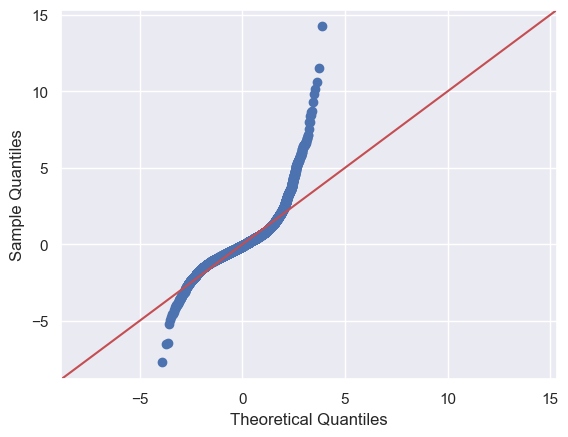

In [105]:
# Now we will visualize the normality of residuals in our model
import scipy.stats as stats
residuals = model2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [126]:
#To check homoscedasticity we will show in a graph the residuals and y predicted values
y_pred2 = model2.predict(X_int)

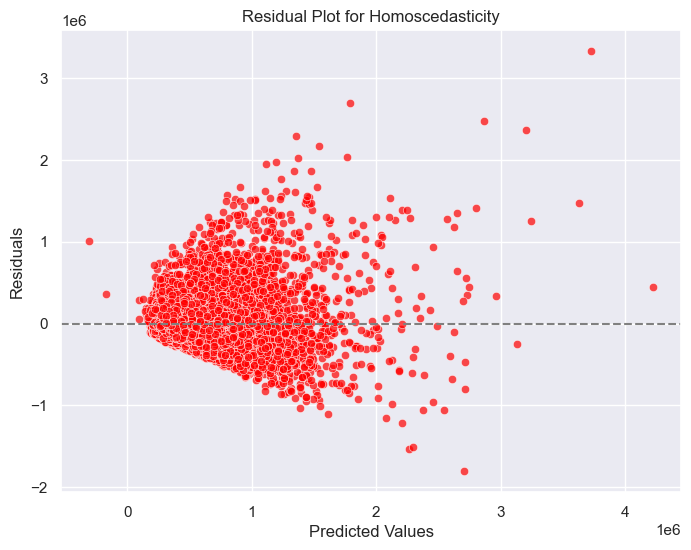

In [127]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred2, y=model2.resid, data=df, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [131]:
# Conclusions for Model 2
#Following are the conclusions based on the second model we built.

#1) R-sqaured and Adjusted R-squared (extent of fit) are the same 0.566, which indicates that 56.6% of the variance in the house price can be explained by our predictors.
#2) Prob(F-stats) (overall model fit) is  0.00 - Model fit is  statistically significant.
#3) p-values - p-values for most of the coefficients (all are 0.000) seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.
# the only exception is for 2 bedrooms apartaments, where the p is equal 0.747, so is more than our significance level. So we can say that this variablr is not stistically significant.

# We can see that the equation of our best fitted line is:
# price=
# 59660+282.862*sqft_living-0.3655*sqft_lot-5579.7056*bedrooms_2-87970*bedrooms_3-130400*bedrooms_4-168500*bedrooms_5-29180*bathrooms_2+80900*bathrooms_3+274700*bathrooms_4+752900*bathrooms_5+843200*bathrooms_6-29880*floors_2+85370*floors_3+768900*waterfront_1.0

# As we can see from our model the most important variable of our model still reamins waterfront, if the house has waterfront view this will increase our price by 768900.

#From our visualization for normality and variance of our residuals, we can say that our residuals are not totally normal distributed and there is an evident heteroscedasticity in our data.


In [132]:
# Now we will create our model 3.

In [144]:
continuous = ['sqft_lot', 'sqft_living', 'price']

In [147]:
# Below l will use log transformation for continuous variables
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [148]:
# one hot encode categoricals
df_dummy = pd.get_dummies(df[categoricals], columns=['bedrooms', 'bathrooms', 'floors', 'waterfront'], drop_first=True)

df_final = pd.concat([df_log_norm, df_dummy], axis=1)

In [149]:
# Let's have a look at our dataframe
df_final.head()

,sqft_lot_log,sqft_living_log,price_log,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bathrooms_2,bathrooms_3,bathrooms_4,bathrooms_5,bathrooms_6,floors_2,floors_3,waterfront_1
0,-0.384112,-1.116598,-1.400094,False,True,False,False,False,False,False,False,False,False,False,False
1,-0.109090,0.735084,0.293500,False,True,False,False,True,False,False,False,False,True,False,False
2,0.248407,-2.132083,-1.800281,True,False,False,False,False,False,False,False,False,False,False,False
3,-0.519513,0.090506,0.514783,False,False,True,False,False,True,False,False,False,False,False,False
4,0.012216,-0.276197,0.191292,False,True,False,False,True,False,False,False,False,False,False,False


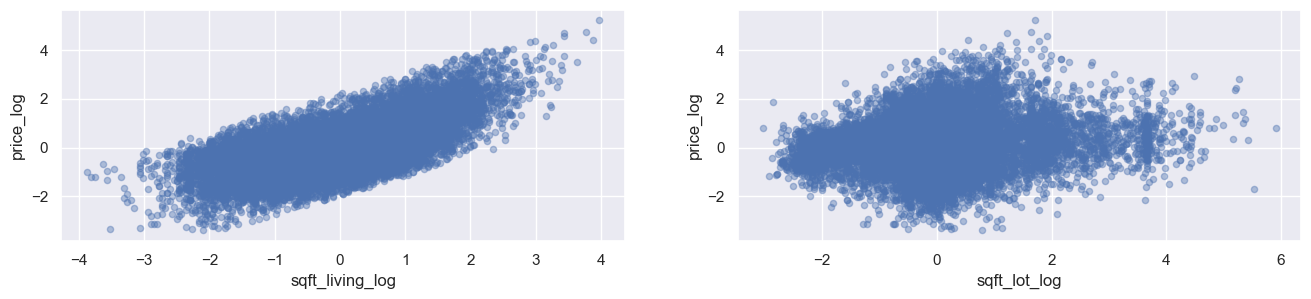

In [151]:
# Below we will visualize the Linearity between log dependent and independent continuous variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_living_log', 'sqft_lot_log'], axes):
    df_final.plot(kind='scatter', x=xcol, y='price_log', ax=ax, alpha=0.4, color='b')

C:\Users\jona_\AppData\Local\Temp\ipykernel_4668\56543510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final['price_log'])


<Axes: xlabel='price_log', ylabel='Density'>

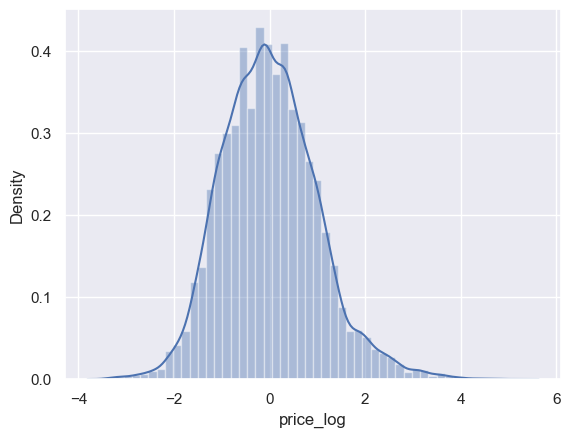

In [190]:
# Below we will see the distribution of our dependent varible. Data are normal distributed.
sns.distplot(df_final['price_log'])

In [152]:
# Now create our model number 2
X = df_final.drop('price_log', axis=1)
y = df_final['price_log']

In [153]:
X_int = sm.add_constant(X)
model3 = sm.OLS(y.astype(float),X_int.astype(float)).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1575.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        11:32:50   Log-Likelihood:                -22604.
No. Observations:               21263   AIC:                         4.524e+04
Df Residuals:                   21248   BIC:                         4.536e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5500      0.053     10.426      0.000       0.447       0.653
sqft_lot_log       -0.0904      0.006    -16.103      0.000      -0.101      -0.079
sqft_living_log     0.7619      0.008     91.475      0.000       0.746       0.778
bedrooms_2         -0.1898      0.052     -3.634      0.000      -0.292      -0.087
bedrooms_3         -0.5617      0.052    -10.804      0.000      -0.664      -0.460
bedrooms_4         -0.6403      0.054    -11.942      0.000      -0.745      -0.535
bedrooms_5         -0.7372      0.057    -13.032      0.000      -0.848      -0.626
bathrooms_2        -0.0563      0.014     -4.152      0.000      -0.083      -0.030
bathrooms_3         0.2748      0.022     12.341      0.000       0.231       0.318
bathrooms_4         0.6294      0.047     13.274      0.000       0.536       0.722
bathrooms_5         1.0480      0.121      8.650      0.000       0.810       1.285
bathrooms_6         1.0676      0.250      4.270      0.000       0.578       1.558
floors_2           -0.0730      0.013     -5.836      0.000      -0.097      -0.048
floors_3            0.2301      0.032      7.261      0.000       0.168       0.292
waterfront_1        1.2679      0.060     21.272      0.000       1.151       1.385
==============================================================================
Omnibus:                       23.498   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.441
Skew:                           0.042   Prob(JB):                     2.21e-05
Kurtosis:                       2.869   Cond. No.                         71.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

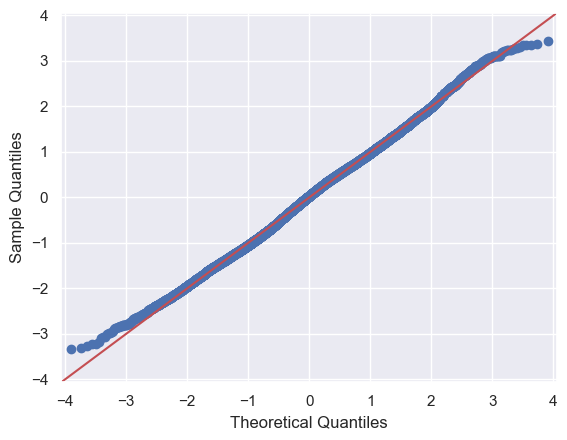

In [154]:
# Now we will visualize the normality of residuals in our model 3
import scipy.stats as stats
residuals = model3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [155]:
#To check homoscedasticity we will show in a graph the residuals and y predicted values
y_pred2 = model3.predict(X_int)

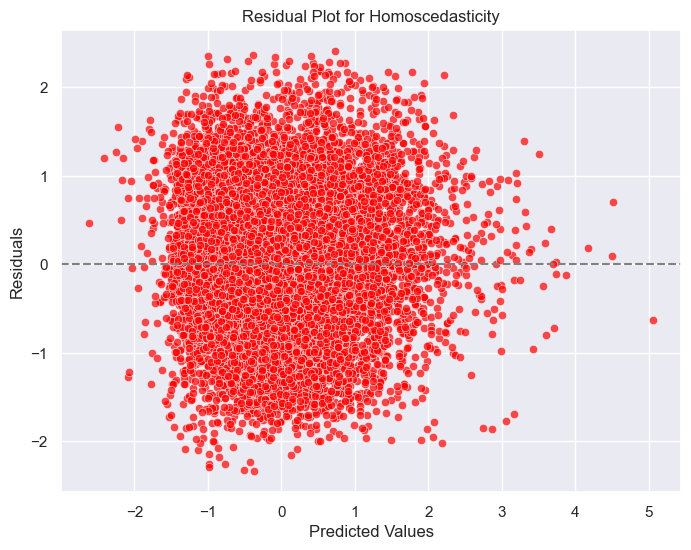

In [156]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred2, y=model3.resid, data=df, color='red', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Homoscedasticity')
plt.show()

In [157]:
# Conclusions for Model 3
#Following are the conclusions based on the second model we built.

#1) R-sqaured and Adjusted R-squared (extent of fit) are the same 0.509, which indicates that 50.9% of the variance in the house price can be explained by our predictors.
#2) Prob(F-stats) (overall model fit) is  0.00 - Model fit is  statistically significant.
#3) p-values for all  coefficients (all are 0.000) seem to be less than the significance level of 0.05. This indicates that all the predictors are statistically significant.

# We can see that the equation of our best fitted line is:
# price=
# 0.55-0.0904*sqft_lot_log+0.7619*sqft_living_log-0.1898*bedrooms_2-0.5617*bedrooms_3-0.6403*bedrooms_4-0.7372*bedrooms_5-0.0563*bathrooms_2+0.2748*bathrooms_3+0.6294*bathrooms_4+1.048*bathrooms_5+1.0676*bathrooms_6-0.073*floors_2+0.2301*floors_3+1.2679*waterfront_1

# As we can see from our model the most important variable of our model still reamins waterfront followed by number of bathrooms, if the house have waterfront view will increase the price by 1.2679%, and if the house has 6 bathrooms the price will increase by 1.0676%.

#From our visualization for linearity of our continuous varibles, normality and variance of our residuals, we can say that our continuous independent and dependent variables have linear relationship,our residuals are normally distributed and there is no heteroscedasticity in our data. So the three assumptions for linear regrassion are no violated.


In [ ]:
# Now we will evaluate our final Model3

In [162]:
#Import libraries we need for evaluation
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# For evaluation of my model l am using Cross Validation. The data will be divided in 5 groups.

In [164]:
linreg = LinearRegression()

In [165]:
cross_validate(linreg, X_int, y, return_train_score=True)

{'fit_time': array([0.06470823, 0.01651645, 0.        , 0.        , 0.02366543]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.51310126, 0.48670085, 0.48470388, 0.50234524, 0.54597313]),
 'train_score': array([0.50794806, 0.51441463, 0.51469174, 0.510822  , 0.4982728 ])}

In [173]:
train_avg = -cross_val_results["train_score"].mean()
train_avg

0.49065512957230134

In [174]:
test_avg = -cross_val_results["test_score"].mean()
test_avg

0.49197879810958706

In [188]:
# Below we will calculate the difference of MSE for train and test data
diff_MSE=train_avg - test_avg
diff_MSE

-0.001323668537285716

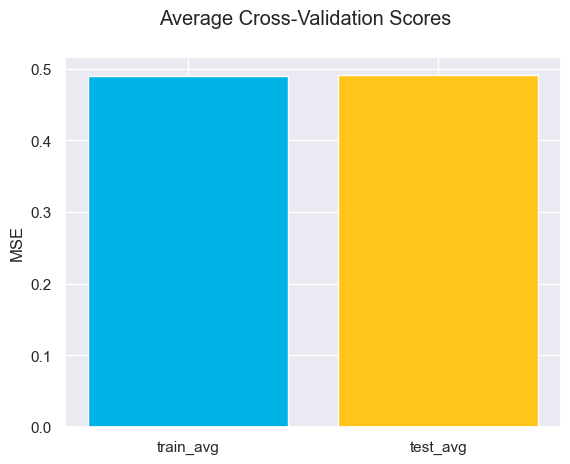

In [189]:
# Let's visualize the two indicatores to have a better idea of the differnce between two of them
cross_val_results = cross_validate(linreg, X_int, y, scoring="neg_mean_squared_error", return_train_score=True)
# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

fig, ax = plt.subplots()
labels = ["train_avg", "test_avg"]
colors = ["#00B3E6", "#FFC51B"]
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("MSE")
fig.suptitle("Average Cross-Validation Scores");

In [ ]:
# The graph and above calculations show that the difference between MSE of train and MSE of test is insignificant (-0.0013). 
# Our model is neither overfitting nor underfitting!